In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

%matplotlib inline
pd.set_option("display.max_rows", None,"display.max_columns", None)
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

In [7]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [6]:
from google.colab import files

# Upload the file from your local system
uploaded = files.upload()

# The file name is 'car data.csv'
import io
df = pd.read_csv(io.BytesIO(uploaded['car data.csv']))

# Display the first few rows of the dataframe
print(df.head())


Saving car data.csv to car data.csv
  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# Split the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Display the first few rows of the training and testing dataframes
print("Training Data:")
print(train_df.head())
print("\nTesting Data:")
print(test_df.head())

Training Data:
                      Car_Name  Year  Selling_Price  Present_Price  \
184           Bajaj Pulsar 150  2008           0.25          0.750   
132          Bajaj Avenger 220  2017           0.75          0.950   
194           Hero  CBZ Xtreme  2008           0.20          0.787   
75                     etios g  2015           3.95          6.800   
111  Royal Enfield Thunder 350  2016           1.15          1.500   

     Kms_Driven Fuel_Type Seller_Type Transmission  Owner  
184       26000    Petrol  Individual       Manual      1  
132        3500    Petrol  Individual       Manual      0  
194       50000    Petrol  Individual       Manual      0  
75        36000    Petrol      Dealer       Manual      0  
111        8700    Petrol  Individual       Manual      0  

Testing Data:
               Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  \
177    Honda Activa 125  2016           0.35           0.57       24000   
289                city  2016          

In [11]:
train_df.shape

(240, 9)

In [12]:
test_df.shape

(61, 9)

In [13]:
train_null_values = train_df.isnull().sum()
print("Training Set Null Values:\n", train_null_values)

Training Set Null Values:
 Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


In [14]:
test_null_values = test_df.isnull().sum()
print("\nTesting Set Null Values:\n", test_null_values)


Testing Set Null Values:
 Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


In [15]:
train_df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [16]:
test_df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

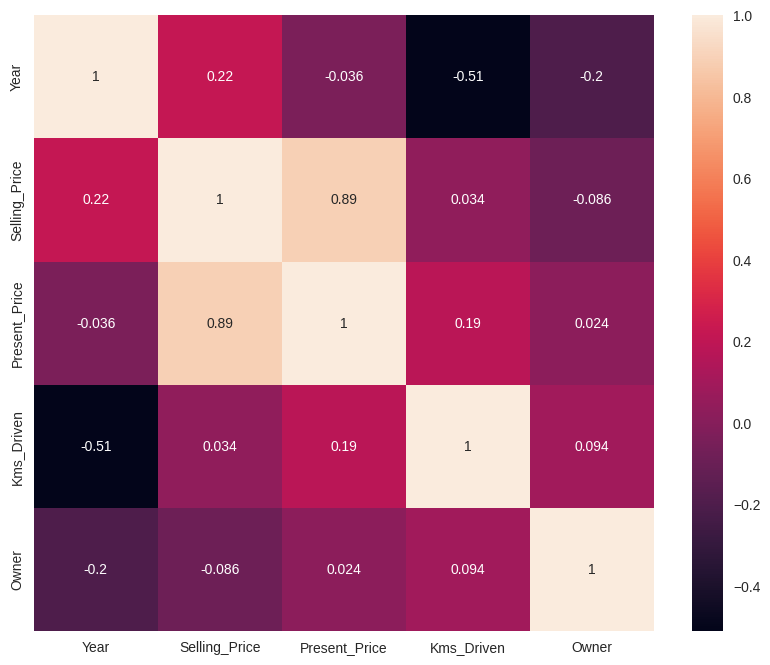

In [17]:
plt.figure(figsize=(10,8))
corr = train_df.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [18]:
train_df.describe() # generating dataframe summary statistics

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,2013.670833,4.642292,7.512012,37508.558333,0.050000
std,2.884815,5.152443,8.991749,41852.348329,0.269821
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.772500,1.050000,15000.000000,0.000000
50%,2015.000000,3.500000,5.935000,31515.500000,0.000000
75%,2016.000000,5.950000,9.400000,48825.250000,0.000000
max,2017.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
train_df.describe(include = 'object') # generating summary statistics for categorical values

,Fuel_Type,Seller_Type,Transmission,Brand
count,240,240,240,240
unique,3,2,2,41
top,Petrol,Dealer,Manual,Bajaj
freq,193,154,210,22


In [19]:
# Assuming you have a DataFrame `train_df` from earlier steps
# Regression plot for Selling_Price and Present_Price
plt.figure(figsize=(10, 6))
sns.regplot(x='Present_Price(lacs)', y='Selling_Price(lacs)', data=train_df)
plt.title('Regression Plot of Selling Price vs Present Price')
plt.xlabel('Present Price (lacs)')
plt.ylabel('Selling Price (lacs)')
plt.show()

KeyError: ignored

<Figure size 1000x600 with 0 Axes>

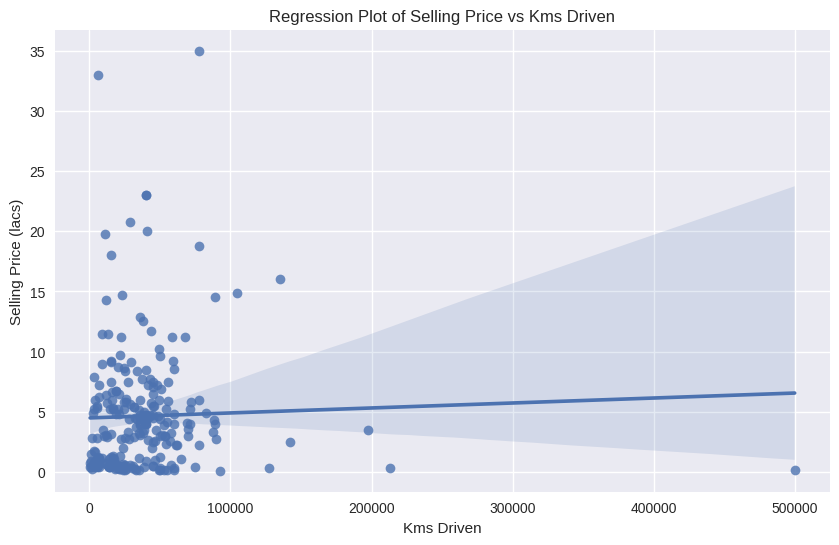

In [ ]:
# Regression plot for Selling_Price and Kms_Driven
plt.figure(figsize=(10, 6))
sns.regplot(x='Kms_Driven', y='Selling_Price(lacs)', data=train_df)
plt.title('Regression Plot of Selling Price vs Kms Driven')
plt.xlabel('Kms Driven')
plt.ylabel('Selling Price (lacs)')
plt.show()

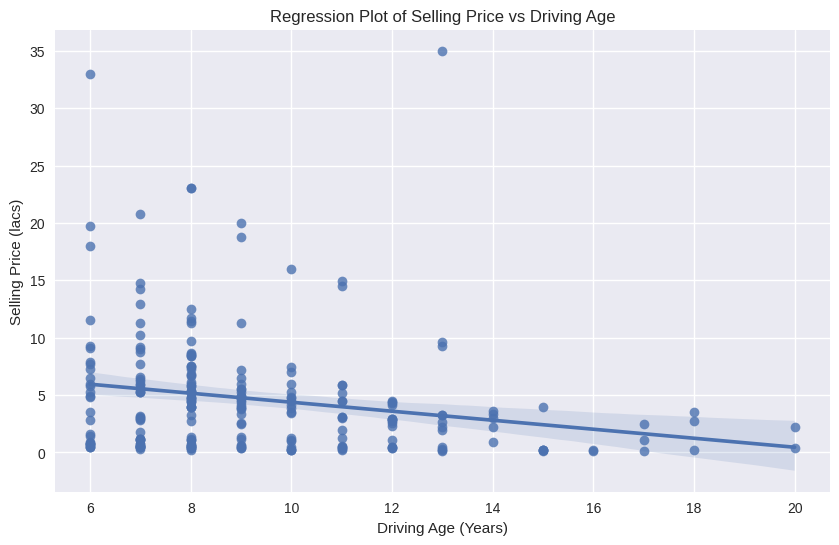

In [ ]:
# Regression plot for Selling_Price and Driving_Age
plt.figure(figsize=(10, 6))
sns.regplot(x='Driving_Age', y='Selling_Price(lacs)', data=train_df)
plt.title('Regression Plot of Selling Price vs Driving Age')
plt.xlabel('Driving Age (Years)')
plt.ylabel('Selling Price (lacs)')
plt.show()

In [ ]:
#Pearson correlation coefficient and p-value
from scipy import stats
pearson_coef, p_value = stats.pearsonr(train_df['Present_Price(lacs)'], train_df['Selling_Price(lacs)'])
print("The Pearson Correlation Coefficient is:", pearson_coef, "and the P-value of P =", p_value)

The Pearson Correlation Coefficient is: 0.8895049606951181 and the P-value of P = 6.408819817297064e-83


In [ ]:
pearson_coef, p_value = stats.pearsonr(train_df['Kms_Driven'], train_df['Selling_Price(lacs)'])
print("The Pearson Correlation Coefficient is:", pearson_coef, "and the P-value of P =", p_value)

The Pearson Correlation Coefficient is: 0.03358170667221187 and the P-value of P = 0.6046847091895003


In [ ]:
pearson_coef, p_value = stats.pearsonr(train_df['Driving_Age'], train_df['Selling_Price(lacs)'])
print("The Pearson Correlation Coefficient is:", pearson_coef, "and the P-value of P =", p_value)

The Pearson Correlation Coefficient is: -0.2195580519975984 and the P-value of P = 0.0006136384365000149


<Axes: xlabel='Present_Price(lacs)', ylabel='Selling_Price(lacs)'>

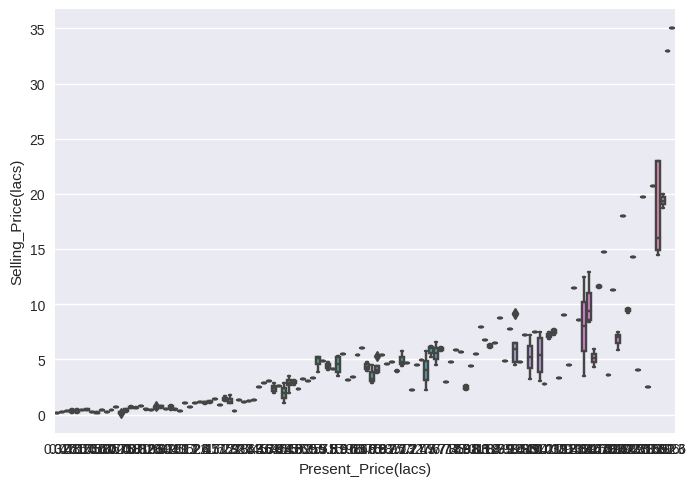

In [ ]:
# Box Plot
sns.boxplot(x="Present_Price(lacs)", y="Selling_Price(lacs)", data=train_df)

<Axes: xlabel='Kms_Driven', ylabel='Selling_Price(lacs)'>

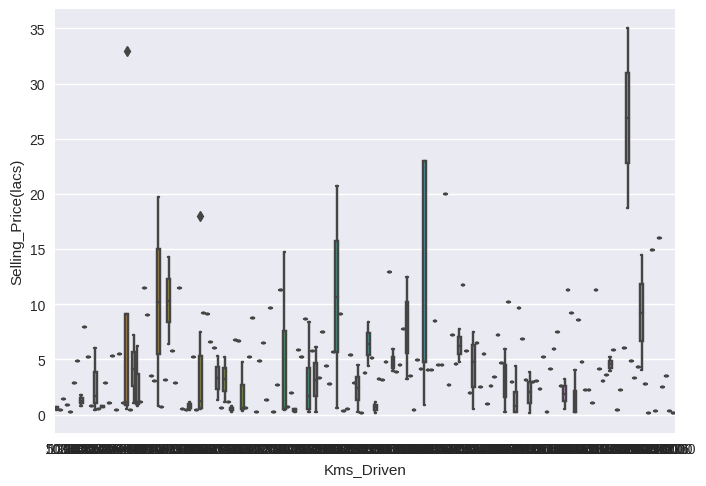

In [ ]:
sns.boxplot(x="Kms_Driven", y="Selling_Price(lacs)", data=train_df)

<Axes: xlabel='Driving_Age', ylabel='Selling_Price(lacs)'>

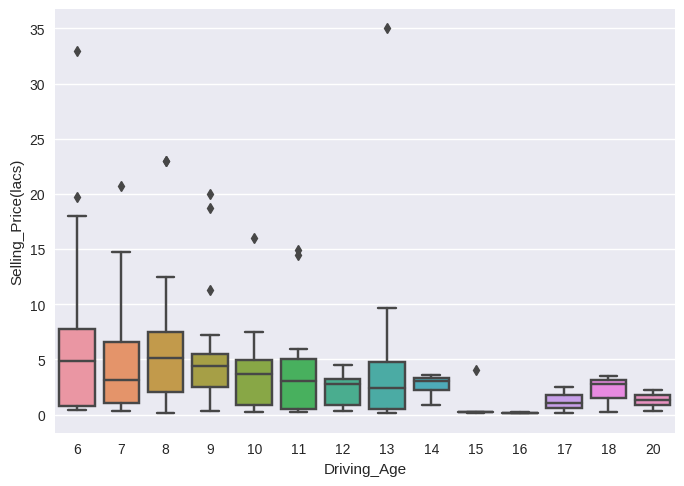

In [ ]:
sns.boxplot(x="Driving_Age", y="Selling_Price(lacs)", data=train_df)

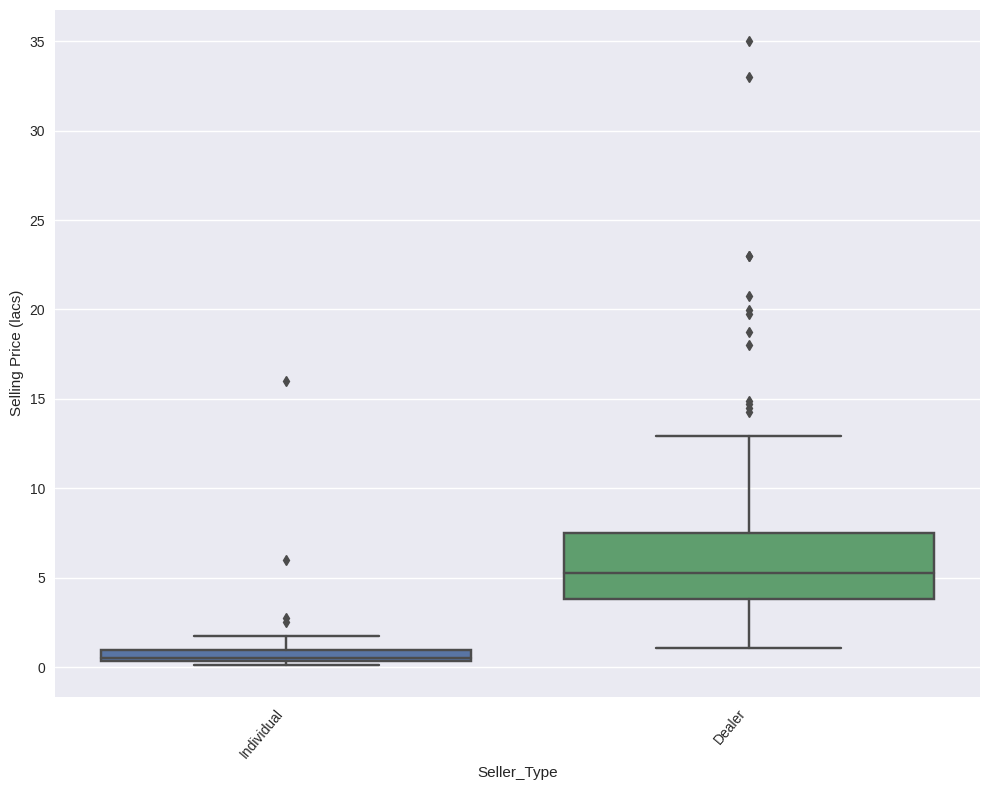

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="Seller_Type", y='Selling_Price(lacs)', data=train_df)
plt.xticks(rotation=50, ha='right')
plt.xlabel('Seller_Type')
plt.ylabel('Selling Price (lacs)')
plt.tight_layout()
plt.show()

<Axes: xlabel='Fuel_Type', ylabel='Selling_Price(lacs)'>

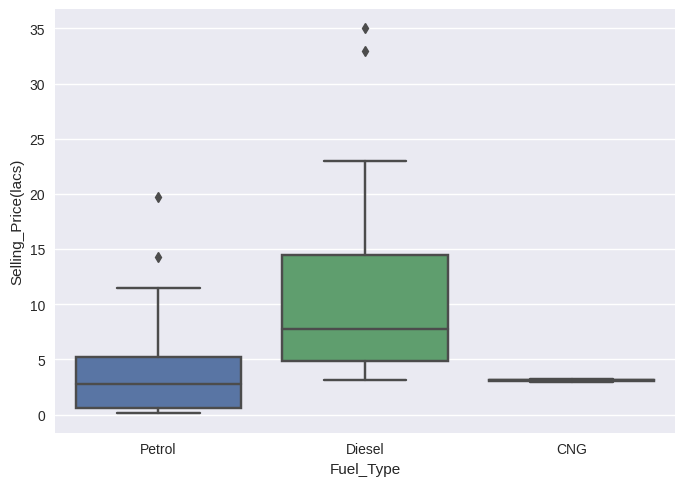

In [ ]:
sns.boxplot(x="Fuel_Type", y='Selling_Price(lacs)', data=train_df)

<Axes: xlabel='Transmission', ylabel='Selling_Price(lacs)'>

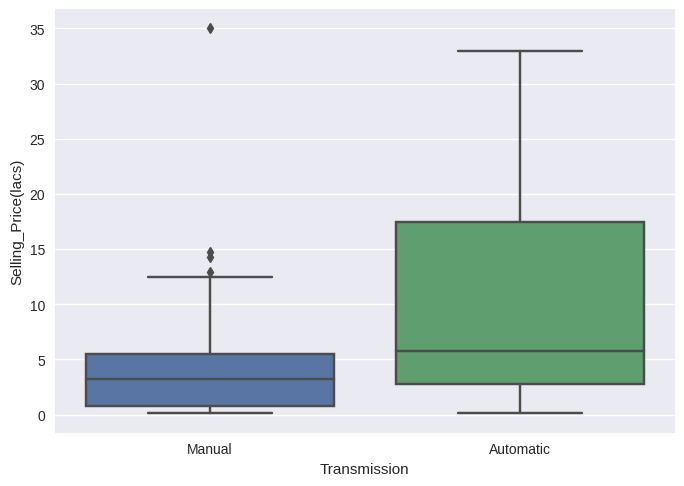

In [ ]:
sns.boxplot(x="Transmission", y='Selling_Price(lacs)', data=train_df)

<Axes: xlabel='Brand', ylabel='Selling_Price(lacs)'>

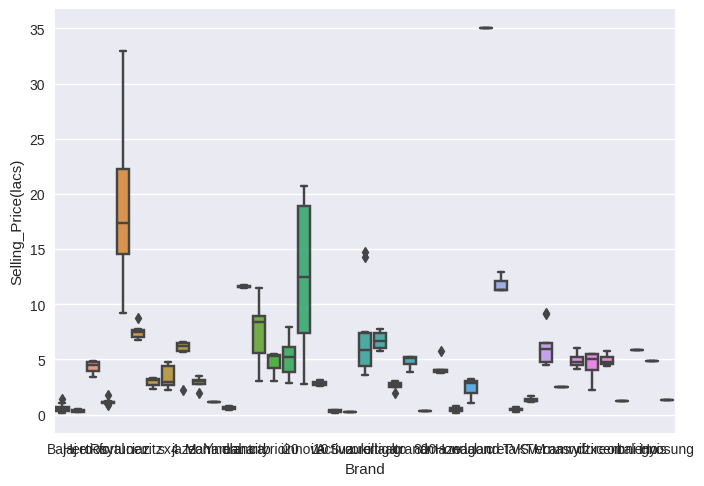

In [ ]:
sns.boxplot(x="Brand", y='Selling_Price(lacs)', data=train_df)

In [ ]:
# 'train_df' and 'test_df' are the training and testing DataFrames
train_df_dropped = train_df.drop('Kms_Driven', axis=1, inplace = True)
test_df_dropped = test_df.drop('Kms_Driven', axis=1, inplace = True)



In [ ]:
train_df.shape

(240, 8)

In [ ]:
test_df.shape

(61, 8)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
categorical_cols = ['Brand', 'Fuel_Type', 'Transmission', 'Seller_Type']
for col in categorical_cols:
  all_categories = pd.concat([train_df[col], test_df[col]], axis=0).unique()
labelencoder.fit(all_categories)
train_df[col] = labelencoder.transform(train_df[col])
test_df[col] = labelencoder.transform(test_df[col])

In [ ]:
train_df.head(10)

,Selling_Price(lacs),Present_Price(lacs),Fuel_Type,Seller_Type,Transmission,Past_Owners,Driving_Age,Brand
184,0.25,0.750,2,1,1,1,15,2
132,0.75,0.950,2,1,1,0,6,2
194,0.20,0.787,2,1,1,0,15,3
75,3.95,6.800,2,0,1,0,8,26
111,1.15,1.500,2,1,1,0,7,8
59,19.99,35.960,1,0,0,0,9,27
93,23.00,30.610,1,0,0,0,8,27
6,6.75,8.120,2,0,1,0,8,18
175,0.38,0.787,2,1,1,0,12,3
30,3.10,5.980,1,0,1,0,11,36


In [ ]:
train_df.head(10)

,Selling_Price(lacs),Present_Price(lacs),Fuel_Type,Seller_Type,Transmission,Past_Owners,Driving_Age,Brand
184,0.25,0.750,2,1,1,1,15,2
132,0.75,0.950,2,1,1,0,6,2
194,0.20,0.787,2,1,1,0,15,3
75,3.95,6.800,2,0,1,0,8,26
111,1.15,1.500,2,1,1,0,7,8
59,19.99,35.960,1,0,0,0,9,27
93,23.00,30.610,1,0,0,0,8,27
6,6.75,8.120,2,0,1,0,8,18
175,0.38,0.787,2,1,1,0,12,3
30,3.10,5.980,1,0,1,0,11,36


In [ ]:
test_df.head(10)

,Selling_Price(lacs),Present_Price(lacs),Fuel_Type,Seller_Type,Transmission,Past_Owners,Driving_Age,Brand
177,0.35,0.57,2,1,0,0,7,4
289,10.11,13.60,2,0,1,0,7,19
228,4.95,9.40,1,0,1,0,11,40
198,0.15,0.57,2,1,1,1,12,2
60,6.95,18.61,2,0,1,0,10,20
9,7.45,8.92,1,0,1,0,8,18
118,1.10,1.47,2,1,1,0,8,8
154,0.50,0.88,2,1,1,0,9,12
164,0.45,0.54,2,1,1,0,7,3
33,6.00,9.95,1,0,1,0,9,25


In [ ]:
import scipy.stats as stats
train_df = stats.zscore(train_df)
test_df = stats.zscore(test_df)

In [ ]:
train_df

,Selling_Price(lacs),Present_Price(lacs),Fuel_Type,Seller_Type,Transmission,Past_Owners,Driving_Age,Brand
184,-0.854249,-0.753596,0.482367,1.338170,0.377964,3.528211,1.969861,-1.389379
132,-0.757005,-0.731307,0.482367,1.338170,0.377964,-0.185695,-1.156443,-1.389379
194,-0.863974,-0.749472,0.482367,1.338170,0.377964,-0.185695,1.969861,-1.306699
75,-0.134643,-0.079351,0.482367,-0.747289,0.377964,-0.185695,-0.461709,0.594956
111,-0.679210,-0.670012,0.482367,1.338170,0.377964,-0.185695,-0.809076,-0.893295
59,2.984949,3.170400,-1.880246,-0.747289,-2.645751,-0.185695,-0.114342,0.677637
93,3.570359,2.574167,-1.880246,-0.747289,-2.645751,-0.185695,-0.461709,0.677637
6,0.409925,0.067757,0.482367,-0.747289,0.377964,-0.185695,-0.461709,-0.066489
175,-0.828966,-0.749472,0.482367,1.338170,0.377964,-0.185695,0.927760,-1.306699
30,-0.299958,-0.170736,-1.880246,-0.747289,0.377964,-0.185695,0.580393,1.421763


In [21]:
test_df


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
177,Honda Activa 125,2016,0.35,0.570,24000,Petrol,Individual,Automatic,0
289,city,2016,10.11,13.600,10980,Petrol,Dealer,Manual,0
228,verna,2012,4.95,9.400,60000,Diesel,Dealer,Manual,0
198,Bajaj Discover 125,2011,0.15,0.570,35000,Petrol,Individual,Manual,1
60,corolla altis,2013,6.95,18.610,40001,Petrol,Dealer,Manual,0
9,ciaz,2015,7.45,8.920,42367,Diesel,Dealer,Manual,0
118,Royal Enfield Classic 350,2015,1.10,1.470,26000,Petrol,Individual,Manual,0
154,Yamaha Fazer,2014,0.50,0.880,8000,Petrol,Individual,Manual,0
164,Hero Splender iSmart,2016,0.45,0.540,14000,Petrol,Individual,Manual,0
33,ertiga,2014,6.00,9.950,45000,Diesel,Dealer,Manual,0


In [20]:
x_train = train_df.drop('Selling_Price(lacs)', axis=1)
y_train = train_df['Selling_Price(lacs)']

x_test = test_df

KeyError: ignored

In [5]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
train_preds_linear = linear_model.predict(x_train)

NameError: ignored

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

linear_rmse = mean_squared_error(y_train, train_preds_linear, squared=False)
print(f"The RMSE for Linear Regression Training Data is: {linear_rmse}")

linear_mae = mean_absolute_error(y_train, train_preds_linear)
print(f"The MAE for Linear Regression on Training Data is: {linear_mae}")

NameError: ignored

In [2]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)

rf_model.fit(x_train, y_train)

train_preds_rf = rf_model.predict(x_train)

NameError: ignored

In [ ]:
randomforest_rmse = mean_squared_error(y_train, train_preds_rf, squared=False)
print(f"The RMSE for Randomv Forest Training Data is: {randomforest_rmse}")

randomforest_mae = mean_absolute_error(y_train, train_preds_rf)
print(f"The MAE for Random Forest on Training Data is: {randomforest_mae}")

The RMSE for Randomv Forest Training Data is: 0.11579577280940755
The MAE for Random Forest on Training Data is: 0.05458095114523864


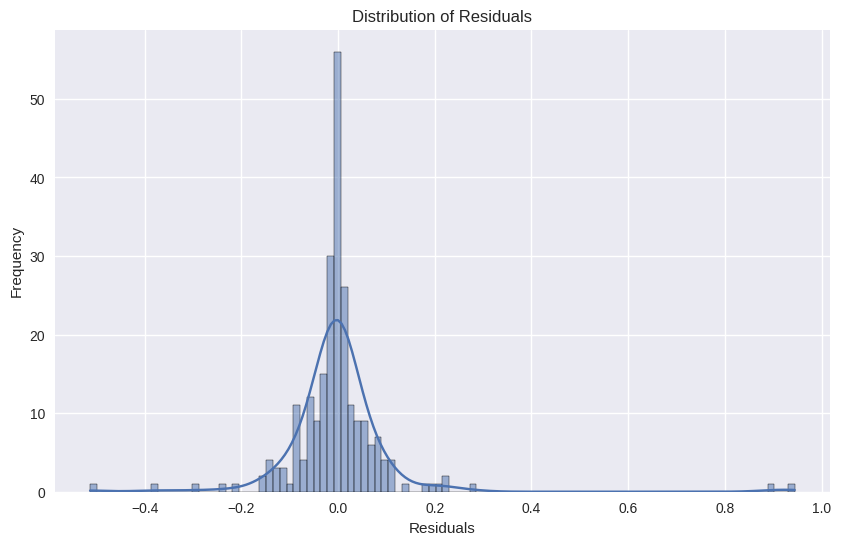

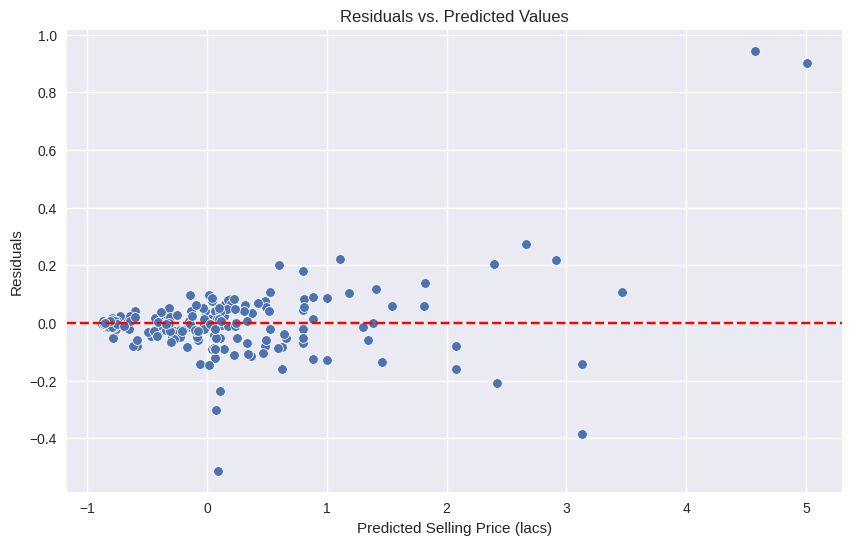

In [ ]:
# Calculate residuals
residuals = y_train - train_preds_linear

# Plot histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Plot scatter plot of predictions vs residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_preds_linear, y=residuals)
plt.axhline(y=0, color='r', linestyle='--') # Add a horizontal line at 0 for reference
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Selling Price (lacs)')
plt.ylabel('Residuals')
plt.show()


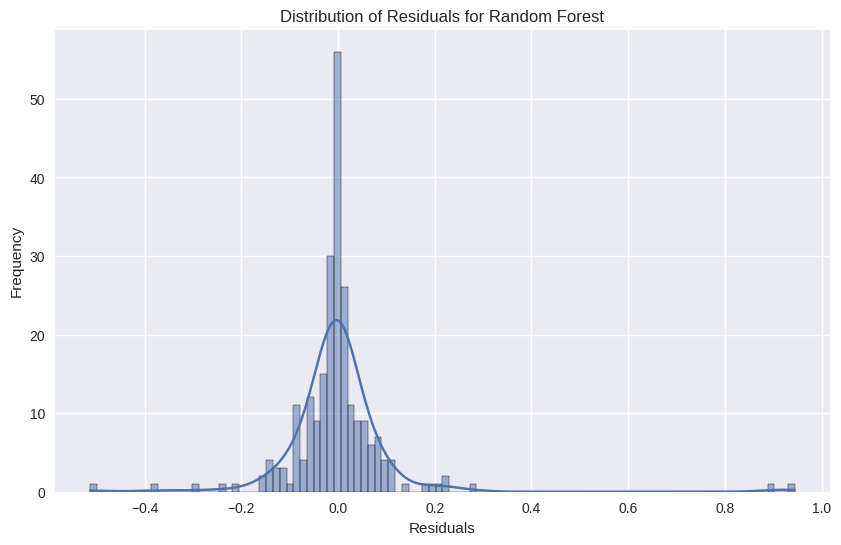

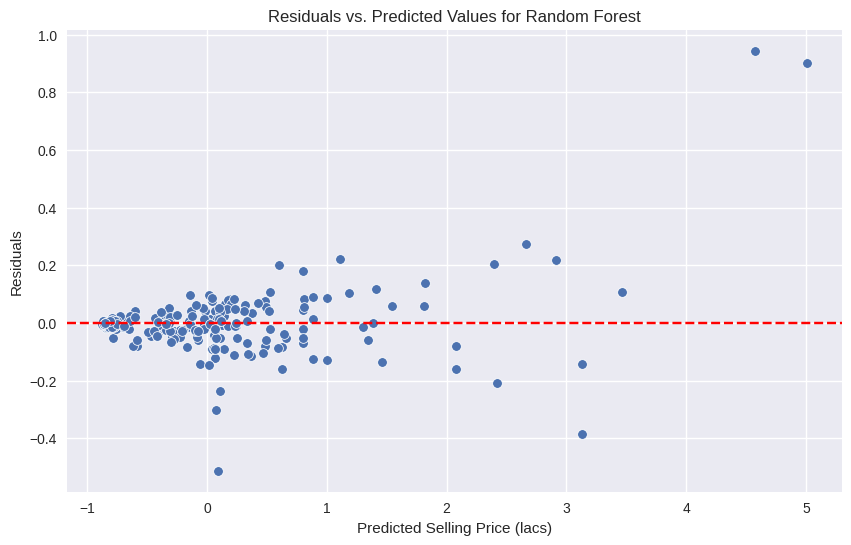

In [ ]:
# Calculate residuals for Random Forest
rf_residuals = y_train - train_preds_rf

# Plot histogram of residuals for Random Forest
plt.figure(figsize=(10, 6))
sns.histplot(rf_residuals, kde=True)
plt.title('Distribution of Residuals for Random Forest')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Plot scatter plot of predictions vs residuals for Random Forest
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_preds_rf, y=rf_residuals)
plt.axhline(y=0, color='r', linestyle='--') # Add a horizontal line at 0 for reference
plt.title('Residuals vs. Predicted Values for Random Forest')
plt.xlabel('Predicted Selling Price (lacs)')
plt.ylabel('Residuals')
plt.show()


In [ ]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
train_preds_linear = linear_model.predict(x_train)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train, y_train)
train_preds_rf = rf_model.predict(x_train)

In [ ]:
linear_rmse = mean_squared_error(y_train, train_preds_linear, squared=False)
linear_mae = mean_absolute_error(y_train, train_preds_linear)

randomforest_rmse = mean_squared_error(y_train, train_preds_rf, squared=False)
randomforest_mae = mean_absolute_error(y_train, train_preds_rf)

print(f"Linear Regression RMSE: {linear_rmse}")
print(f"Linear Regression MAE: {linear_mae}")
print(f"Random Forest RMSE: {randomforest_rmse}")
print(f"Random Forest MAE: {randomforest_mae}")

Linear Regression RMSE: 0.34251157663210385
Linear Regression MAE: 0.23084376853887809
Random Forest RMSE: 0.11579577280940755
Random Forest MAE: 0.05458095114523864


In [ ]:
if linear_rmse < randomforest_rmse:
  print("Linear Regresion performs better on the basis of RMSE")
else:
  print("Random Forest performs better on the basis of RMSE")

if linear_mae < randomforest_mae:
  print("Linear Regression performs better on the basis of MAE")
else:
  print("Random Forest performs better on the basis of MAE")

Random Forest performs better on the basis of RMSE
Random Forest performs better on the basis of MAE


In [ ]:
y_pred_test_rf = rf_model.predict(x_test)

In [ ]:
y_pred_test_linear =  linear_model.predict(x_test)